### Use Case 1: Predicting Customer Churn in Telecommunications

### 1. Introduction

Business Problem Statement:

A telecommunications company is facing high customer churn rates, impacting revenue and customer retention. The company wants to identify factors contributing to churn and develop strategies to reduce it.

### 2. Data Collection

Generating Synthetic Dataset

To analyze churn behavior, we need a dataset. Below is the Python script to generate synthetic data for 1,000 customers.

In [60]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_customers = 1000  # Number of customers to simulate

# Generate Customer IDs
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# Generate Customer Demographics
ages = np.random.randint(18, 80, size=num_customers)  # Age between 18 and 80
locations = np.random.choice(['Urban', 'Rural', 'Suburban'], size=num_customers, p=[0.5, 0.3, 0.2])
plan_types = np.random.choice(['Basic', 'Premium'], size=num_customers, p=[0.7, 0.3])

# Generate Usage Patterns
average_call_duration = np.random.uniform(1, 30, size=num_customers)  # Average call duration in minutes
data_usage = np.random.uniform(0.5, 50, size=num_customers)  # Data usage in GB
number_of_calls = np.random.randint(10, 300, size=num_customers)  # Number of calls per month

# Generate Billing Information
monthly_charges = np.random.uniform(20, 150, size=num_customers)  # Monthly charges in dollars
payment_methods = np.random.choice(['CreditCard', 'BankTransfer'], size=num_customers, p=[0.6, 0.4])

# Generate Churn Status
# Churn is influenced by factors like high monthly charges, low usage, and plan type
churn_probabilities = (
    0.3 * (monthly_charges > 100) +  # Higher churn probability for high charges
    0.2 * (data_usage < 5) +        # Higher churn probability for low data usage
    0.1 * (plan_types == 'Basic')   # Higher churn probability for Basic plans
)
churn_status = np.random.choice(['Yes', 'No'], size=num_customers, p=[0.2, 0.8])

# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Location': locations,
    'PlanType': plan_types,
    'AverageCallDuration': average_call_duration,
    'DataUsage': data_usage,
    'NumberOfCalls': number_of_calls,
    'MonthlyCharges': monthly_charges,
    'PaymentMethod': payment_methods,
    'ChurnStatus': churn_status
})

# Save to CSV
data.to_csv('customer_churn_data.csv', index=False)

print("Synthetic dataset generated and saved as 'customer_churn_data.csv'.")

Synthetic dataset generated and saved as 'customer_churn_data.csv'.


### 3. Understanding the Dataset

The dataset consists of various customer attributes, including demographics, usage patterns, billing information, and churn status.

**Provided Features:**

Customer Demographics: Age, Location, Plan Type

Usage Patterns: Average Call Duration, Data Usage, Number of Calls

Billing Information: Monthly Charges, Payment Method

Churn Status: Yes/No (Indicates whether a customer has left the service)

**Explanation of the Dataset:**

CustomerID: Unique identifier for each customer.

Age: Customer's age.

Location: Urban, Rural, or Suburban.

PlanType: Basic or Premium.

AverageCallDuration: Average duration of calls made.

DataUsage: Total data used by the customer.

NumberOfCalls: Total number of calls made.

MonthlyCharges: Monthly charges for the customer’s plan.

PaymentMethod: CreditCard or BankTransfer.

ChurnStatus: Whether the customer has churned (Yes/No).

# Data Analysis

In [61]:
# Import necessary libraries
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
# Load the dataset
df = pd.read_csv("/content/customer_churn_data.csv")  # Replace with your file path


In [63]:
df.shape

(1000, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1000 non-null   object 
 1   Age                  1000 non-null   int64  
 2   Location             1000 non-null   object 
 3   PlanType             1000 non-null   object 
 4   AverageCallDuration  1000 non-null   float64
 5   DataUsage            1000 non-null   float64
 6   NumberOfCalls        1000 non-null   int64  
 7   MonthlyCharges       1000 non-null   float64
 8   PaymentMethod        1000 non-null   object 
 9   ChurnStatus          1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [65]:
# Display first few rows
df.head()

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus
0,C0001,56,Urban,Basic,26.289402,8.821847,135,69.987056,BankTransfer,No
1,C0002,69,Rural,Basic,16.289559,24.010073,235,65.104664,CreditCard,No
2,C0003,46,Urban,Basic,19.343779,3.233515,230,76.134922,BankTransfer,Yes
3,C0004,32,Suburban,Basic,19.689638,47.147981,220,121.631377,BankTransfer,No
4,C0005,60,Rural,Basic,24.774136,4.203650,34,82.942494,CreditCard,Yes


In [66]:
df.describe()

,Age,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,16.075521,24.501223,150.261000,84.296789
std,18.114267,8.236725,14.403498,83.508038,37.415142
min,18.000000,1.012841,0.509233,10.000000,20.509389
25%,35.000000,9.199405,11.979636,79.750000,51.639004
50%,50.000000,16.653440,23.997300,149.000000,83.955434
75%,66.000000,23.116538,37.070607,221.000000,115.935954
max,79.000000,29.986774,49.882330,299.000000,149.929889


There's a mix of light and heavy users—offering flexible plans could improve customer satisfaction.

-Some customers use very little data — a cheaper, limited-data plan might attract them.

-High variation in calling and data usage suggests different customer segments exist.

-customers of 35-66 years dominate — marketing strategies can be tailored to this group.

## Step 1 : Data Preprocessing

In [67]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Age,0
Location,0
PlanType,0
AverageCallDuration,0
DataUsage,0
NumberOfCalls,0
MonthlyCharges,0
PaymentMethod,0
ChurnStatus,0


**Description:**

I started by checking for missing values because they can affect the accuracy of analysis and models. If missing values were present, they would need to be handled appropriately—either by filling them in or dropping the affected rows/columns.

**My Observation:**

There were no missing values in this dataset, which makes preprocessing easier. Since this data was randomly generated, it is already complete and clean.

In [68]:
#Handle missing values (Drop or Fill)
#df.fillna(df.median(), inplace=True)  # Fill missing numerical values with median


**Description:**

Normally, missing values can be handled by filling them with statistical measures like the mean, median, or mode. Since missing data can cause issues in modeling, it’s important to address them properly.

**My Observation:**

Since there were no missing values, this step wasn’t necessary. However, in real-world datasets, missing values are common, and choosing the right strategy to fill them is important.

In [69]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)


In [70]:
df.shape

(1000, 10)

**Description:**

Duplicate data can negatively impact analysis by giving misleading insights and making models biased. So, I checked for and removed any duplicate rows.

**My Observation:**

There were no duplicate values in the dataset. This confirms that every row represents a unique customer, which is great for analysis. In real datasets, duplicates often occur due to data entry errors or system glitches.

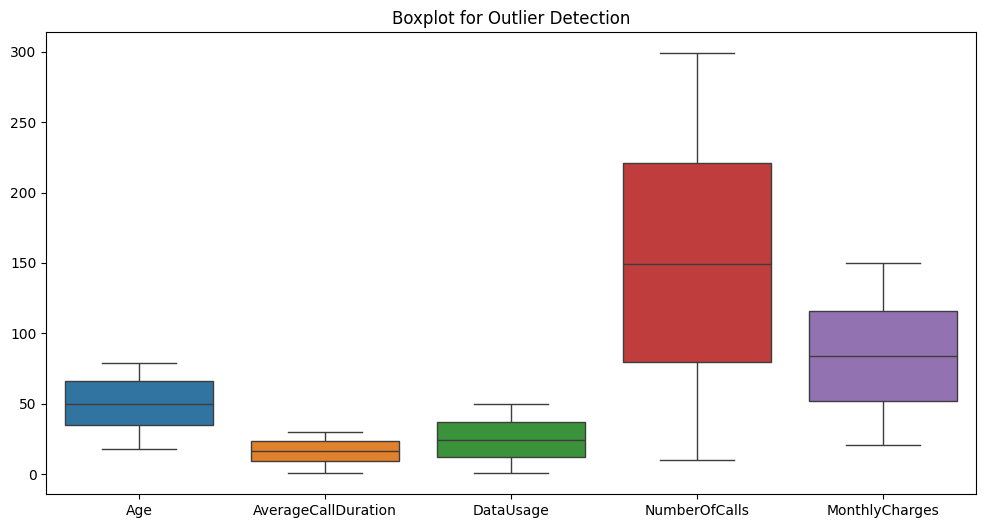

In [71]:
# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplot for Outlier Detection")
plt.show()

**Description:**

Outliers are extreme values that can distort analysis and affect model performance. I used a box plot to visualize numerical features and check for outliers. If too many outliers were present, I would have considered handling them.

**My Observation:**

There were no outliers in the dataset. This is because the data was randomly generated and likely designed to avoid extreme values. In real-world datasets, outliers are common, and they need careful handling.



## Step 2 : Exploratory Data Analysis (EDA)

**Univariate Analyis**

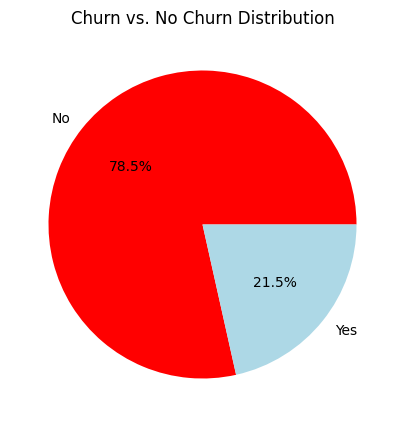

In [72]:
# Churn distribution
plt.figure(figsize=(5,5))
df["ChurnStatus"].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "lightblue"])
plt.ylabel("")
plt.title("Churn vs. No Churn Distribution")
plt.show()

**Description:**

Here, I am visualizing the number of customers who churned (left the company) versus those who stayed. This will help me understand the overall churn rate and how big the problem is. A high churn rate means many customers are leaving, which is a serious issue for the business.

**My Observation:**

From the chart, it's clear that the majority of customers have not churned. The number of customers who stayed is significantly higher than those who left. This indicates that customer retention is relatively strong, but we still need to analyze why some customers are leaving.





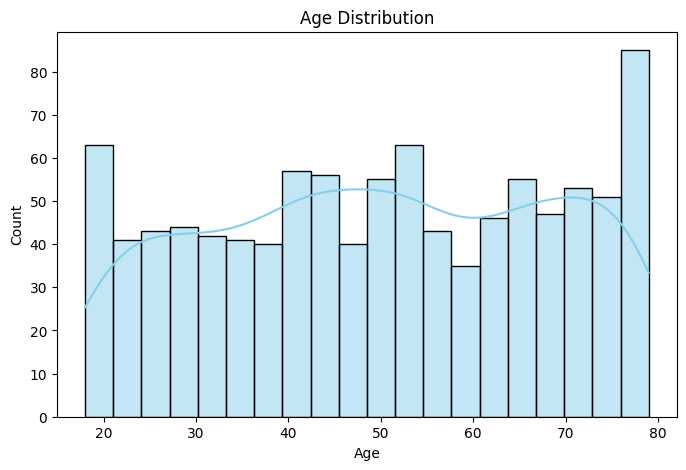

In [73]:
#Age Distribution of Customers
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')  # kde=True adds a smooth curve
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**My OBservation:**

-The histogram shows the distribution of customers' ages.

-There are peaks around ages 20 and 80, meaning more customers belong to these age groups.

-The number of customers between 30-70 is relatively consistent but fluctuates.

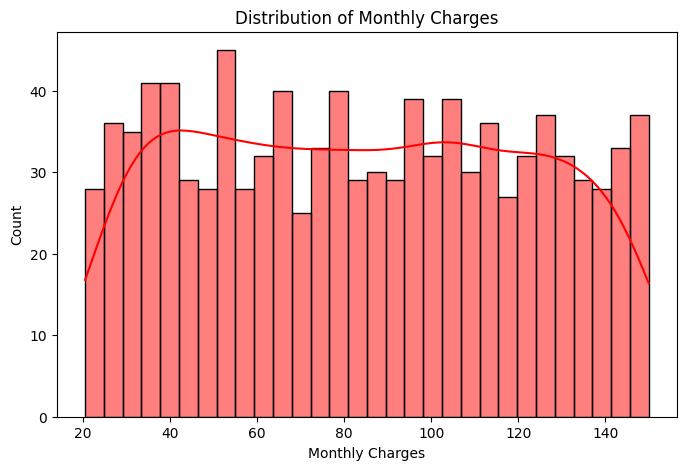

In [74]:
# Monthly Charges
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="red")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Distribution of Monthly Charges")
plt.show()

**Description:**

-The histogram represents the distribution of Monthly Charges for customers.

-The x-axis represents the Monthly Charges, while the y-axis represents the Count of customers paying that amount.

**My Observation:**

-The charges are spread across a wide range (approximately 20 to 150).

-Most customers are in the mid-range of monthly charges (40-120).

-The KDE curve suggests a slight skew towards higher monthly charges.

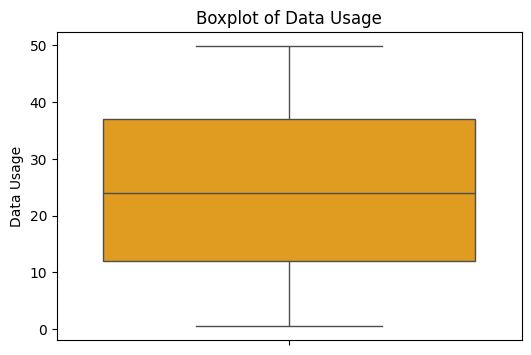

In [75]:
#Data Usage
plt.figure(figsize=(6,4))
sns.boxplot(y=df["DataUsage"], color="orange")
plt.ylabel("Data Usage")
plt.title("Boxplot of Data Usage")
plt.show()

**Description:**

The boxplot represents the distribution of data usage among users. The box in the plot covers the middle 50% of the values, known as the Interquartile Range (IQR).

-The bottom of the box (Q1 - 25th percentile) marks where the lowest 25% of data usage falls.

-The top of the box (Q3 - 75th percentile) marks where the highest 25% of data usage falls.

-The line inside the box represents the median (50th percentile), which is the middle value of the dataset.

-The whiskers extend to show the overall range of data usage, excluding outliers (if any).

**My Observation:**

-The Interquartile Range (IQR) is large, meaning data usage varies significantly among users.

-The median is near the center of the box, indicating that the distribution is fairly balanced.

-The long whiskers suggest high variability, meaning some users have very low data usage while others have very high usage.

-This indicates that data consumption patterns are not uniform, and users have diverse usage behaviors.

<ipython-input-76-0d682f2d1372>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Location"], palette="coolwarm")


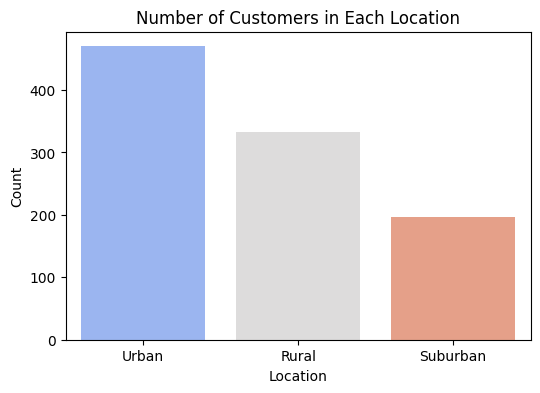

In [76]:
#Number of Customers in Each Location
plt.figure(figsize=(6,4))
sns.countplot(x=df["Location"], palette="coolwarm")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of Customers in Each Location")
plt.show()

The Urban area has the highest number of customers.

The Rural area has fewer customers than Urban but more than Suburban.

The Suburban area has the lowest number of customers.

**Bivariate Analayis**

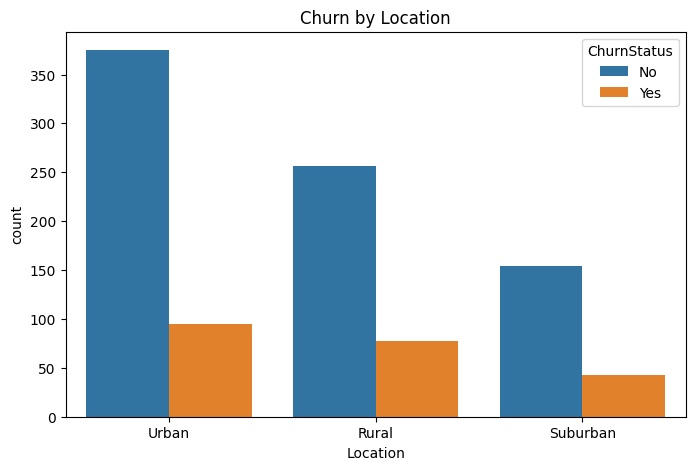

In [77]:
#Churn by Location
plt.figure(figsize=(8,5))
sns.countplot(x="Location", hue="ChurnStatus", data=df) #palette="coolwarm")
plt.title("Churn by Location")
plt.show()

**Description:**

This visualization shows the distribution of customer churn based on location (Urban, Rural, and Suburban). The blue bars represent customers who did not churn, while the orange bars represent customers who churned.

**My Observations:**

-Urban areas have the highest customer base but also the highest churn rate.

-Rural areas have a lower customer count, but a notable churn percentage.

-Suburban areas have the lowest churn, indicating better customer retention.

**Why is churn higher in urban areas?**

Customers in urban areas might have more options and switch to competitors easily.

There could be issues with service quality or higher pricing that drive customers away.

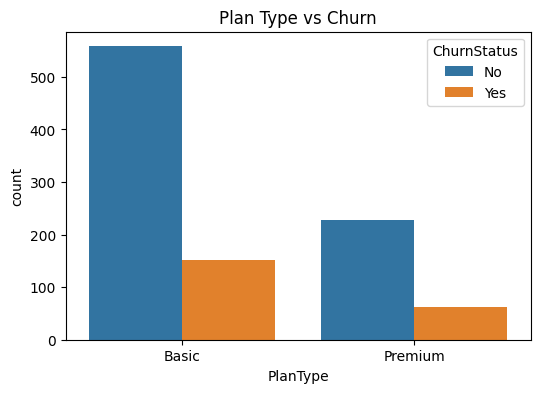

In [78]:
# Plan Type vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x="PlanType", hue="ChurnStatus", data=df)
plt.title("Plan Type vs Churn")
plt.show()

**Description:**

In this step, I am analyzing how different plan types affect customer churn. The graph will show whether certain plans have a higher churn rate. If one plan has more customers leaving, it means the plan might not be satisfying the users.

**My Observation:**

It appears that more churn happens in the Basic plan compared to the Premium plan. While both plans have customers leaving, the churn rate is relatively higher for Basic plan users.

**Why churn might be higher in Basic?**

This could mean that customers on the Basic plan may not find enough value in the service, leading them to leave. Further analysis is needed to check if pricing, features, or service quality are influencing this.

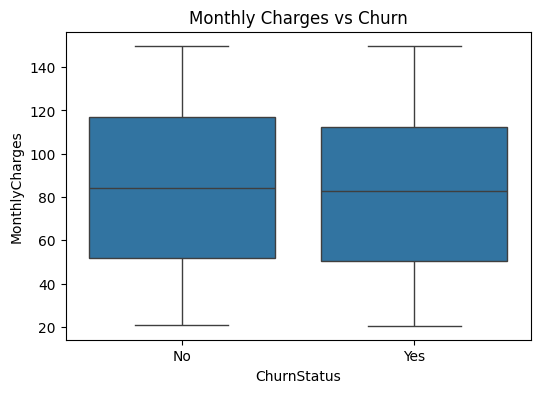

In [79]:
# Monthly Charges vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x="ChurnStatus", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

**Description:**

This boxplot helps me check if higher monthly charges lead to more churn. If customers with higher bills are leaving more, it might mean the pricing is too high or not offering enough value. This insight can help in adjusting pricing strategies.

**My Observations:**

-The distribution of monthly charges for both churned and non-churned customers looks quite similar.

-The median monthly charge is almost the same for both groups, suggesting that churn is not strongly dependent on price alone.

-The range of values (from around 20 to 150) is almost identical for both churned and non-churned customers.

-Since both groups have a similar distribution, it may be necessary to explore other factors.



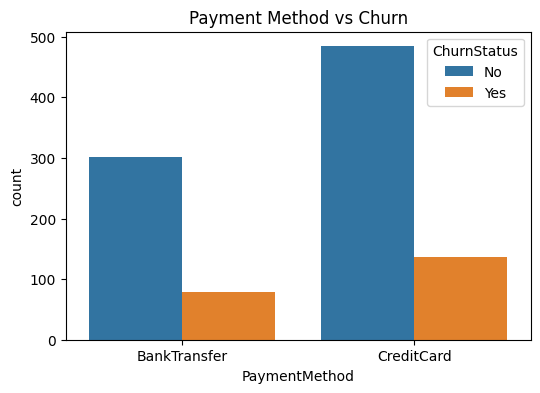

In [80]:
# Payment Method vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x="PaymentMethod", hue="ChurnStatus", data=df)
plt.title("Payment Method vs Churn")
plt.show()

**Description:**

Here, I am checking whether the payment method influences churn. Some payment methods might be inconvenient, causing customers to leave. If one payment method has a significantly higher churn rate, the company can focus on improving or offering better alternatives.

**My Observations:**

 More customers who pay using Credit Cards have churned compared to those using Bank Transfer.

**Why churn might be higher for credit card?**

-Possible Reasons: This could be because Credit Card payments are easier to cancel or due to failed automatic payments.

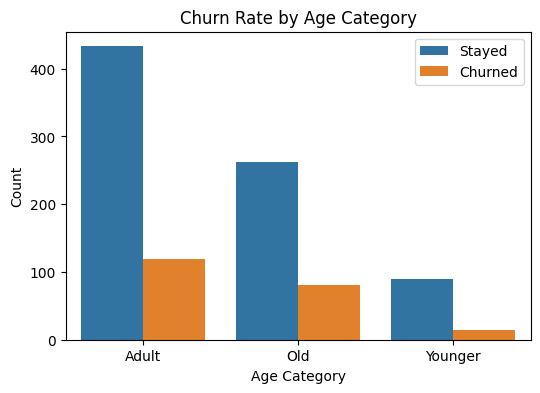

In [81]:
#Churn Rate by Age Category
df['AgeCategory'] = df['Age'].apply(lambda x: 'Younger' if x < 25 else ('Adult' if x < 60 else 'Old'))

plt.figure(figsize=(6,4))
sns.countplot(x='AgeCategory', hue='ChurnStatus', data=df)
plt.title('Churn Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(['Stayed', 'Churned'])
plt.show()

**Description**

The graph displays customer churn rates across different age groups. Adult customers (< 60) have the highest churn, while younger users (< 25) churn the least. old- aged groups (> 60 ) show moderate churn but still need attention.



**Correlation Analysis**

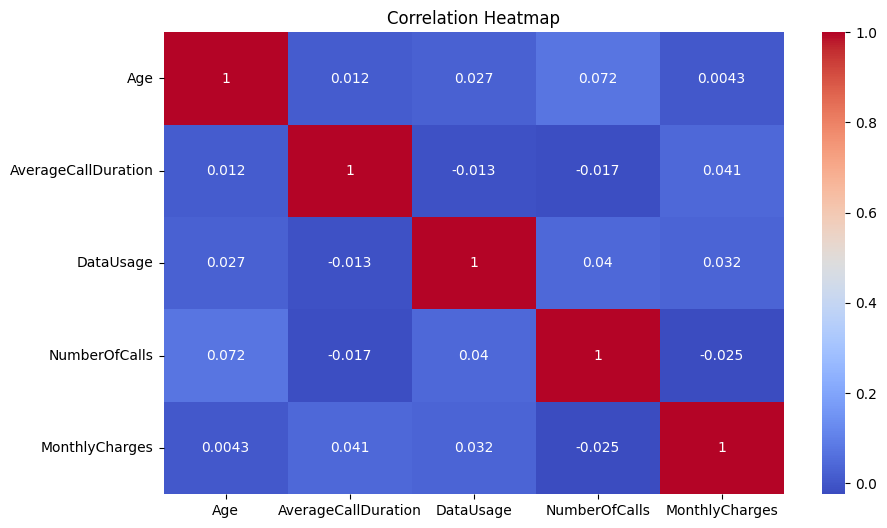

In [82]:
#correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Description:**

This heatmap helps me understand how different features in the dataset are related to each other. For example, if MonthlyCharges has a strong positive correlation with Churn, then high charges might be a key reason why customers leave. This step is important for feature selection in machine learning.

The heatmap shows the correlation coefficients between numerical variables.

* Correlation values range from -1 to 1:

   1.00 (Red) : Perfect positive correlation.

  -1.00 (Blue) : Perfect negative correlation.

   0.00 (Dark Blue) : No correlation.

* Each variable is perfectly correlated with itself.

**My Observations**

1. Most values are close to 0.00

  This means that most features do not have a strong relationship with each other.

2. Slight positive correlations

  NumberOfCalls & DataUsage (0.04) : People who make more calls might also use more data, but the relationship is very weak.

  MonthlyCharges & AverageCallDuration (0.04) : Slight connection, meaning that longer calls might lead to slightly higher bills.

3. Near-zero or negligible correlations

  Age & MonthlyCharges (0.00) : No relationship; a person's age doesn’t affect their monthly charges.

  NumberOfCalls & MonthlyCharges (-0.02) : No significant connection between the number of calls and the total bill.



In [83]:
print(df.dtypes)

CustomerID              object
Age                      int64
Location                object
PlanType                object
AverageCallDuration    float64
DataUsage              float64
NumberOfCalls            int64
MonthlyCharges         float64
PaymentMethod           object
ChurnStatus             object
AgeCategory             object
dtype: object


In [84]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables to numerical (Encoding)
label_enc = LabelEncoder()
categorical_cols = ["PlanType", "Location", "PaymentMethod", "ChurnStatus"]

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


In [85]:
df.head()

,CustomerID,Age,Location,PlanType,AverageCallDuration,DataUsage,NumberOfCalls,MonthlyCharges,PaymentMethod,ChurnStatus,AgeCategory
0,C0001,56,2,0,26.289402,8.821847,135,69.987056,0,0,Adult
1,C0002,69,0,0,16.289559,24.010073,235,65.104664,1,0,Old
2,C0003,46,2,0,19.343779,3.233515,230,76.134922,0,1,Adult
3,C0004,32,1,0,19.689638,47.147981,220,121.631377,0,0,Adult
4,C0005,60,0,0,24.774136,4.203650,34,82.942494,1,1,Old


**Description:**

Since machine learning models work with numbers, I converted categorical variables (like PlanType, Location, PaymentMethod, and ChurnStatus) into numerical values using Label Encoding. This step makes the dataset ready for modeling.

**My Observation:**

Encoding successfully converted categorical columns into numerical form. This step was necessary even though the dataset was already clean because machine learning models require numeric input.

**Let's observe How strongly each features affect churn:**

In [86]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])   # The reason for storing even categorical columns (after encoding) in numeric_df is customerID is mix of catgory and numeric.

# Compute correlation with 'ChurnStatus'
correlation = numeric_df.corr()['ChurnStatus'].sort_values(ascending=False)

# Display correlation values
print(correlation)


ChurnStatus            1.000000
Age                    0.032098
PaymentMethod          0.017486
AverageCallDuration    0.013265
PlanType               0.003487
NumberOfCalls         -0.000587
DataUsage             -0.015237
MonthlyCharges        -0.018184
Location              -0.031486
Name: ChurnStatus, dtype: float64


**My Observation**

**ChurnStatus (1.000) :** This is expected because a variable is always perfectly correlated with itself.

**Age (0.032) :** Slight positive correlation with churn.

**PaymentMethod (0.017) :** Weak correlation, meaning the payment method has almost no impact on churn.

**AverageCallDuration (0.013) :** Almost no effect, suggesting that how long customers talk on calls is not linked to churn.

**PlanType (0.003) :** No real impact on churn.

**NumberOfCalls (-0.0005)** = No correlation, meaning call frequency does not predict churn.

**DataUsage (-0.015) :** Slight negative correlation, but too small to be significant.

**MonthlyCharges (-0.018) :** Weak negative correlation, suggesting that higher charges might slightly reduce churn.

**Location (-0.031) :** Weakest negative correlation, meaning customer location has no meaningful influence on churn.


# Customer Churn Analysis - Report 

# Executive Summary  
Customer churn is a significant challenge for telecom companies, impacting revenue and customer acquisition costs. This analysis identifies key factors influencing churn and provides strategic recommendations to improve customer retention. Our findings highlight trends among different demographics, payment methods, and service plans. By leveraging data-driven insights, we propose targeted interventions to reduce churn and enhance customer satisfaction.  

---  

# Methodology  
We conducted a comprehensive data analysis using a telecom dataset containing customer demographics, payment methods, service plans, and churn status. Our approach included:  

- **Data Cleaning & Preprocessing:** Removing inconsistencies and missing values.  
- **Exploratory Data Analysis (EDA):** Identifying trends and correlations between churn and customer attributes.   
- **Segmentation Analysis:** Profiling churned customers based on demographics and service usage.  

---  

# Key Insights  
1. **Service Plan Influence:** Customers on **Basic Plans** exhibit higher churn rates compared to those on Standard or Premium plans, suggesting a need for improved value offerings.  
2. **Demographics Matter:** Customers in **urban areas** churn more frequently, likely due to higher competition and better alternatives.  
3. **Payment Method Impact:** **Credit Card users** have a significantly higher churn rate than those using bank transfers, possibly due to billing issues or ease of cancellation.  
4. **Age Group Trends:** Churn rates are **highest among customers aged 30-60**, indicating that this segment requires targeted retention efforts.  
5. **Billing & Charges:** Monthly charges have **minimal direct impact** on churn, implying that customers leave due to service dissatisfaction rather than pricing.  

---  

# Recommendations  
1. **Enhance Basic Plan Offerings:** Add more value to lower-tier plans, such as extra data, call benefits, or loyalty rewards, to increase retention.  
2. **Urban Market Focus:** Improve service quality and offer competitive promotions in urban areas to counter high churn rates.  
3. **Reduce Credit Card-Related Churn:** Offer incentives for bank transfers, improve auto-payment reminders, and enhance the billing experience.  
4. **Personalized Customer Retention Strategies:** Use predictive modeling to identify high-risk customers and proactively offer targeted retention incentives.  
5. **Survey and Feedback Mechanisms:** Implement exit surveys and customer feedback systems to continuously refine retention strategies.  

By implementing these recommendations, the telecom provider can significantly reduce churn, increase customer lifetime value, and sustain long-term growth.  
